<a href="https://colab.research.google.com/github/thalesdaviddom/IC-Lorena-Chico/blob/main/Dataset_analysis_latin_america_polisci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset description and exclusion criteria**

This is a short data analisys of the dataset gathered for the purpose if the research on Latin America Political Science. This work aims to apply text-mining tools as suck textual forma mentis networks and topic modeling in the abstracts and main text of research articles from latin america OR about latin america. The exclusion criteria followed here is the same as the one used by Codato et al (https://www.scielo.br/j/bpsr/a/QXshntQdFfDF5G3kTsBk3Bk/?format=pdf). For the information of abstracts, title, year of publication, authors keywords, source title and DOI we used the Scopus Platform, information on citation queried on DOI has been gathered on OpenAlex and used to construct 2 citation networks: the first having all the articles who are cited or cites articles belonging to the original dataset and a second subnetwork composed only by the nodes that are present in the first dataset, in both of them the nodes are indetified by OpenAlex ID presents in the original dataset (for those articles that were available in OpenAlex). The countries of the articles have been selected according to the coutries of the journals which publishes them and the name of PDF is according to the PDFs available for download in the Scopus platform.

Fisrt of all, we should upload the data:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Material_IC/Corpus/Artigos/dataset de trabalho/dataset.csv')
df.head()

,Unnamed: 0,Title,DOI,PDF Name,OpenAlex_id,Year,Source Title,Abstract,Author Keywords,Language of Original Document,Journal Country
0,0,Fighting for the True Path of Revolution: The ...,10.1177/0094582x241300288,Fighting-for-the-True-Path-of-Revolution-The-C...,https://openalex.org/W4405262715,2024,Latin American Perspectives,The Salvadoran Communist Party (PCS) underwent...,El Salvador; Latin American Communism; Revolut...,English,United States
1,1,Media representations of the Chilean press on ...,10.35956/v.24.n1.2024.p.66-85,Media-representations-of-the-Chilean-press-on-...,https://openalex.org/W4401198837,2024,Latin-American Journal of Discourse Studies,The study analyses media representations of th...,Chilean constitutional process; Critical Disco...,Spanish,Brazil
2,2,Autonomies and the Construction of Communal Ec...,10.1177/0094582x241297919,Autonomies-and-the-Construction-of-Communal-Ec...,https://openalex.org/W4404511688,2024,Latin American Perspectives,"San José, a Zapotec community in the Sierra Su...",Communal autonomies; Communal economies; Commu...,English,United States
3,3,Income Protection for Vulnerable Groups During...,10.1177/0094582x241308856,Income-Protection-for-Vulnerable-Groups-During...,https://openalex.org/W4406033597,2025,Latin American Perspectives,How can we understand the variation in countri...,Brazil; Chile; COVID-19; Emergency measures; I...,English,United States
4,4,Partisan Stereotyping and Polarization in Brazil,10.1017/lap.2023.38,Partisan-Stereotyping-and-Polarization-in-Braz...,https://openalex.org/W4389787718,2024,Latin American Politics and Society,"In recent decades, Brazilian voters have grown...",antipetismo; Brazil; negative partisanship; pa...,English,United States


Lets see some basic info of this dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5409 entries, 0 to 5408
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     5409 non-null   int64 
 1   Title                          5409 non-null   object
 2   DOI                            5409 non-null   object
 3   PDF Name                       3555 non-null   object
 4   OpenAlex_id                    5338 non-null   object
 5   Year                           5409 non-null   int64 
 6   Source Title                   5409 non-null   object
 7   Abstract                       5409 non-null   object
 8   Author Keywords                4260 non-null   object
 9   Language of Original Document  5409 non-null   object
 10  Journal Country                5409 non-null   object
dtypes: int64(2), object(9)
memory usage: 465.0+ KB


Since we aim to understand the developing of latin america politics in the last years we should focus first in understeand how is our dataset distributed along the time:

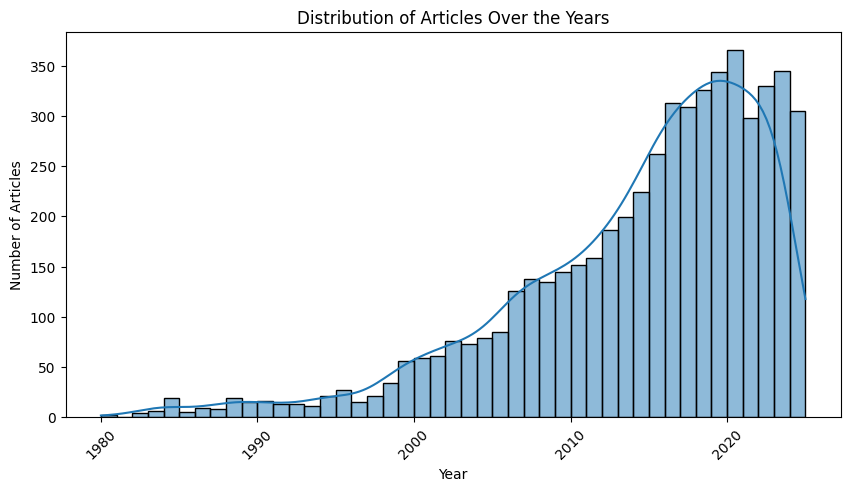

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_year_distribution(df, year_column):
    plt.figure(figsize=(10, 5))
    sns.histplot(df, x=year_column, bins=range(df[year_column].min(), df[year_column].max() + 1), kde=True)
    plt.xlabel("Year")
    plt.ylabel("Number of Articles")
    plt.title("Distribution of Articles Over the Years")
    plt.xticks(rotation=45)
    plt.show()

# Usage example
plot_year_distribution(df, "Year")  # Replace "year_column_name" with the actual column name


We see the most of our articles are from most recent years, we must keep this in mid while performing the later analisys since our dataset is strong biased for comtenporary work. Actually, it seems we could broadly separate the dataset in 3 pieces: The scarce works of 1980 and 1990, the growing population in the 2000s and the maximum at 2010. Actually, Codato makes a difference between the scientific production from Latin America (produced in latin american countries) and that one produce abroad, let's check for the disdribuition of works between all countries in the dataset:

<ipython-input-7-5c50d9e349de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


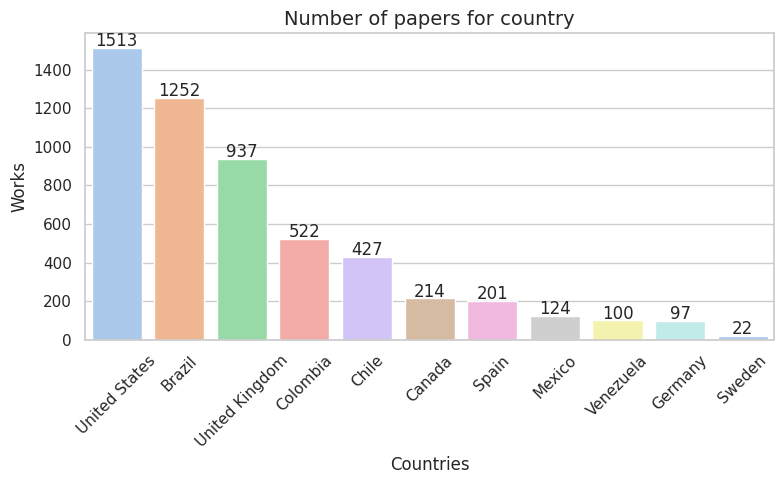

In [7]:
# Set style
sns.set(style="whitegrid")

# Create a count plot (distribution of categories)
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    x='Journal Country',                     # Column to plot
    palette="pastel",                # Color scheme
    order=df['Journal Country'].value_counts().index  # Sort by frequency
)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',    # Display count as integer
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Customize labels & title
plt.title("Number of papers for country", fontsize=14)
plt.xlabel("Countries", fontsize=12)
plt.ylabel("Works", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.tight_layout()
plt.show()

According to Codato's categories we would have:

<ipython-input-13-e529b1fa385b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


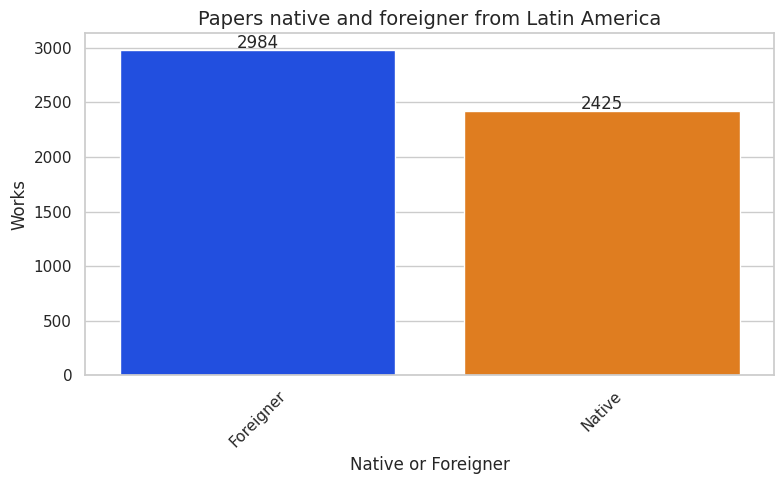

In [13]:
# List of "Native" countries
native_countries = ['Brazil', 'Colombia', 'Chile', 'Mexico', 'Venezuela']

# Create the new variable
df['Native or Foreigner'] = df['Journal Country'].apply(
    lambda x: 'Native' if x in native_countries else 'Foreigner'
)

# Create a count plot (distribution of categories)
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    x='Native or Foreigner',                     # Column to plot
    palette="bright",                # Color scheme
    order=df['Native or Foreigner'].value_counts().index  # Sort by frequency
)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',    # Display count as integer
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Customize labels & title
plt.title("Papers native and foreigner from Latin America", fontsize=14)
plt.ylabel("Works", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.tight_layout()
plt.show()

We'll check too for the temporarl distribuition of these two categories:

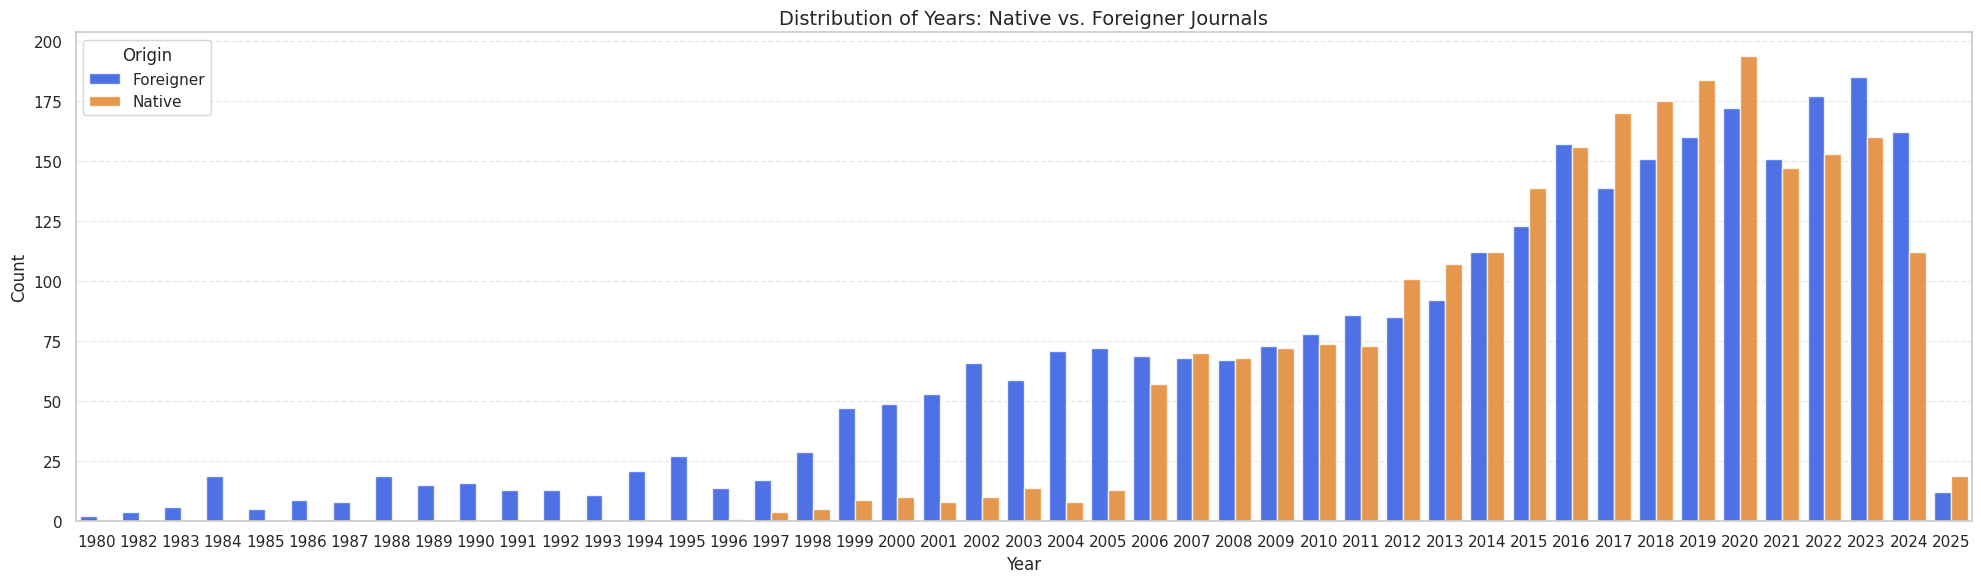

In [18]:
# Get the first two colors from the 'bright' palette
bright_colors = sns.color_palette("bright", 2)
foreigner_color, native_color = bright_colors[0], bright_colors[1]



plt.figure(figsize=(20, 6))
sns.countplot(
    data=df,
    x='Year',                          # Years on x-axis
    hue='Native_or_Foreigner',         # Color by Native/Foreigner
    palette={'Native': native_color, 'Foreigner': foreigner_color},  # Custom colors
    alpha=0.8,                        # Transparency
    dodge=True                        # Side-by-side bars
)

# Customize
plt.title('Distribution of Years: Native vs. Foreigner Journals', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Origin')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

As we can see unfortunatelly we don't have much native journals until the late 2000s. We should check too for the distribuition of languages:

<ipython-input-22-9000f68d1aca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


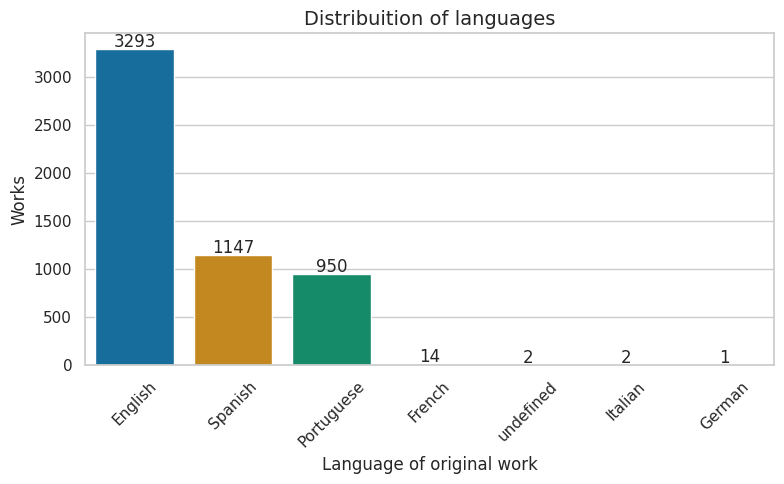

In [22]:
# Set style
sns.set(style="whitegrid")

# Create a count plot (distribution of categories)
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    x='Language of Original Document',                     # Column to plot
    palette="colorblind",                # Color scheme
    order=df['Language of Original Document'].value_counts().index  # Sort by frequency
)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',    # Display count as integer
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Customize labels & title
plt.title("Distribuition of languages", fontsize=14)
plt.xlabel("Language of original work", fontsize=12)
plt.ylabel("Works", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.tight_layout()
plt.show()

It will be useful too to know the proportion of language from the works we have the full PDF:

<ipython-input-26-9cbed3e499a1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


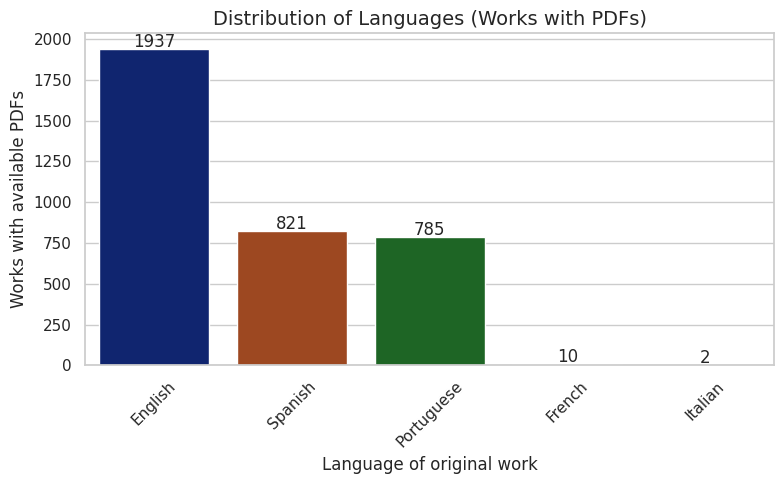

In [26]:
# Set style
sns.set(style="whitegrid")

# Filter out rows where 'PDF Name' is null
df_filtered = df[df['PDF Name'].notna()]

# Create a count plot using only works with PDFs
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df_filtered,
    x='Language of Original Document',
    palette="dark",
    order=df_filtered['Language of Original Document'].value_counts().index
)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Customize labels & title
plt.title("Distribution of Languages (Works with PDFs)", fontsize=14)
plt.xlabel("Language of original work", fontsize=12)
plt.ylabel("Works with available PDFs", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

And, finally, the distribuition of Journals:

In [25]:
# Create a frequency table
dist_table = df['Source Title'].value_counts().reset_index()
dist_table.columns = ['Journal', 'Number of Works']

# Add percentage column
dist_table['Percentage (%)'] = (dist_table['Number of Works'] / len(df)) * 100
dist_table['Percentage (%)'] = dist_table['Percentage (%)'].round(2)  # Round to 2 decimals

# Sort by count (descending)
dist_table = dist_table.sort_values('Number of Works', ascending=False)

# Styled table with colors (requires Jupyter/IPython)
styled_table = dist_table.style \
    .background_gradient(subset=['Number of Works'], cmap='Blues') \
    .format({'Percentage (%)': '{:.2f}%'}) \
    .set_caption('Distribution of Works Across Journals')

styled_table

,Journal,Number of Works,Percentage (%)
0,Latin American Perspectives,810,14.98%
1,Revista de Sociologia e Politica,391,7.23%
2,Latin American Research Review,376,6.95%
3,Bulletin of Latin American Research,367,6.78%
4,Dados,345,6.38%
5,Journal of Latin American Studies,329,6.08%
6,Latin American Politics and Society,327,6.05%
7,Revista de Ciencia Politica,277,5.12%
8,Opiniao Publica,254,4.70%
9,Lua Nova,240,4.44%


# Conclusion

We could see from our brief analisys tha our dataset is strongly biased towards more recent work on political science, moreover it has more research about Latin America from foreign countries than research based in Latin America. The "Foreign Countries" here are basically USA and UK with a few works from other european countries and canada.    